In [1]:
import sys, os
import xsimlab as xs
import xarray as xa
import pandas as pd
import numpy as np

sys.path.insert(0, os.path.join(os.getcwd(), '..'))
import vmlab

In [2]:
from vmlab.models import fruit_model_w_branching
fruit_model_w_branching

<xsimlab.Model (10 processes, 5 inputs)>
params
    path              [in]
    seed              [in]
env
gu_growth
    nb_leaves      [inout] ('GU',) 
fruit_growth
    nb_fruits_ini  [inout] ('GU',) 
inflo_growth
    bloom_date     [inout] ('GU',) bloom date
carbon_unit
light
photo
carbon
fruit_quality

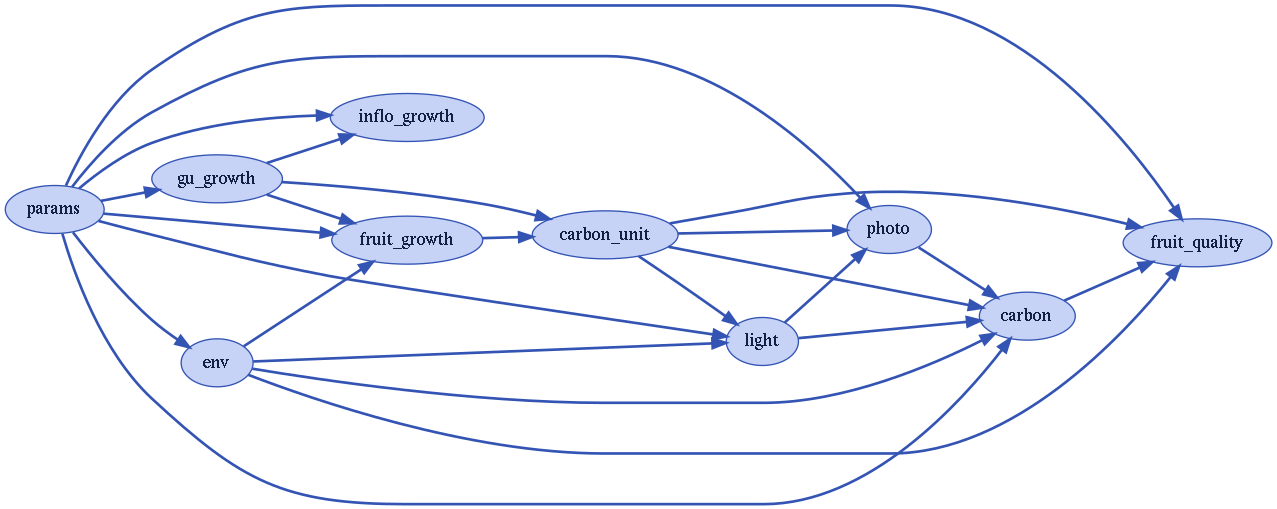

In [3]:
fruit_model_w_branching.visualize(show_inputs=False, show_variables=False)

In [4]:
ds = vmlab.create_setup(
    model=fruit_model_w_branching,
    clocks={
        'day': pd.date_range(start='2002-09-02', end='2003-03-28', freq="1d")
    },
    master_clock='day',
    input_vars={
        'params': {
            'seed': 0,
            'path': '../share/simulations/default.toml'
        },
        'inflo_growth': { 
            'bloom_date': [
                '2002-11-01',
                '2002-11-10',
                '2002-11-20',
                '2002-11-30',
                '2003-01-10',
                '2003-01-20'
            ]
        },
        'gu_growth': {
            'nb_leaves': [5, 10, 25, 50, 100, 150]
        },
        'fruit_growth': {
            'nb_fruits_ini': [1, 1, 1, 1, 1, 1]
        }
    }
)

In [5]:
ds

<xarray.Dataset>
Dimensions:                      (GU: 6, day: 208)
Coordinates:
  * day                          (day) datetime64[ns] 2002-09-02 ... 2003-03-28
Dimensions without coordinates: GU
Data variables:
    params__seed                 int64 0
    params__path                 <U33 '../share/simulations/default.toml'
    inflo_growth__bloom_date     (GU) <U10 '2002-11-01' ... '2003-01-20'
    gu_growth__nb_leaves         (GU) int64 5 10 25 50 100 150
    fruit_growth__nb_fruits_ini  (GU) int64 1 1 1 1 1 1

In [6]:
ds_out = ds.xsimlab.run(model=fruit_model_w_branching)

In [7]:
ds_out

<xarray.Dataset>
Dimensions:                                (CU: 6, GU: 6, day: 208, hour: 24)
Coordinates:
  * CU                                     (CU) <U3 'CU0' 'CU1' ... 'CU4' 'CU5'
  * GU                                     (GU) int64 0 1 2 3 4 5
  * day                                    (day) datetime64[ns] 2002-09-02 .....
  * hour                                   (hour) int8 0 1 2 3 4 ... 20 21 22 23
Data variables:
    carbon__DM_fruit                       (day, CU) float64 0.0 0.0 ... 101.0
    carbon__DM_fruit_delta                 (day, CU) float64 0.0 0.0 ... 1.087
    carbon__DM_structural_leaf             (day, CU) float64 0.0 0.0 ... 111.1
    carbon__DM_structural_stem             (day, CU) float64 53.66 ... 53.66
    carbon__D_fruit                        (day, CU) float64 0.0 0.0 ... 0.5041
    carbon__MR_fruit                       (day, CU) float64 0.0 0.0 ... 0.1557
    carbon__MR_leaf                        (day, CU) float64 0.0 0.0 ... 0.3376
    carbon__MR_repro                       (day, CU) float64 0.0 0.0 ... 0.1557
    carbon__MR_stem                        (day, CU) float64 0.0 0.0 ... 0.07078
    carbon__MR_veget                       (day, CU) float64 0.0 0.0 ... 0.4083
    carbon__assimilates                    (day, CU) float64 0.04289 ... 3.163
    carbon__remains_1                      (day, CU) float64 0.04289 ... 2.755
    carbon__remains_2                      (day, CU) float64 0.04289 ... 2.599
    carbon__remains_3                      (day, CU) float64 0.04289 ... 2.095
    carbon__required_DM_fruit              (day, CU) float64 0.0 0.0 ... 0.0 0.0
    carbon__reserve_leaf                   (day, CU) float64 0.0 0.0 ... 2.053
    carbon__reserve_leaf_max               (day, CU) float64 0.0 0.0 ... 0.0 0.0
    carbon__reserve_mob                    (day, CU) float64 0.04289 ... 0.07343
    carbon__reserve_nmob_leaf              (day, CU) float64 0.0 0.0 ... 0.0 0.0
    carbon__reserve_nmob_stem              (day, CU) float64 2.573 ... 2.53
    carbon__reserve_stem                   (day, CU) float64 2.616 ... 2.573
    carbon_unit__CUxGU                     (day, CU, GU) float64 1.0 0.0 ... 1.0
    carbon_unit__DM_fruit_0                (day, CU) float64 0.0 0.0 ... 21.38
    carbon_unit__DM_fruit_max              (day, CU) float64 0.0 0.0 ... 113.1
    carbon_unit__dd_cum                    (day, CU) float64 0.0 0.0 ... 700.0
    carbon_unit__dd_delta                  (day, CU) float64 0.0 0.0 ... 8.85
    carbon_unit__nb_fruits                 (day, CU) float64 0.0 0.0 ... 1.0 1.0
    carbon_unit__nb_leaves                 (day, CU) float64 5.0 10.0 ... 150.0
    env__GR                                (day, hour) float64 0.0 0.0 ... 0.0
    env__RH                                (day, hour) float64 76.0 ... 78.0
    env__TM                                (day) float64 21.6 20.9 ... 24.85
    env__TM_air                            (day, hour) float64 20.7 ... 24.85
    env__T_air                             (day, hour) float64 17.1 ... 21.3
    env__T_fruit                           (day, hour) float64 17.1 ... 21.3
    fruit_growth__DM_fruit_0               (day, GU) float64 21.38 ... 21.38
    fruit_growth__DM_fruit_max             (day, GU) float64 0.0 0.0 ... 113.1
    fruit_growth__dd_cum                   (day, GU) float64 0.0 0.0 ... 700.0
    fruit_growth__dd_delta                 (day, GU) float64 0.0 0.0 ... 8.85
    fruit_growth__nb_fruits                (day, GU) float64 0.0 0.0 ... 1.0 1.0
    fruit_growth__nb_fruits_ini            (day, GU) int64 1 1 1 1 1 ... 1 1 1 1
    fruit_quality__DM_flesh                (day, CU) float64 0.0 0.0 ... 68.19
    fruit_quality__DM_fleshpeel            (day, CU) float64 0.0 0.0 ... 82.89
    fruit_quality__FM_fruit                (day, CU) float64 0.0 0.0 ... 449.1
    fruit_quality__W_flesh                 (day, CU) float64 0.0 0.0 ... 286.0
    fruit_quality__W_fleshpeel             (day, CU) float64 0.0 0.0 ... 319.2
    fruit

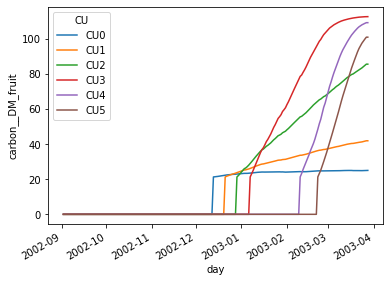

In [8]:
ds_out.carbon__DM_fruit.plot.line(x='day')

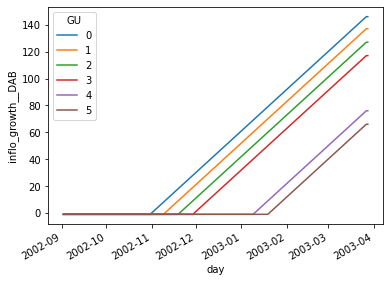

In [9]:
ds_out.inflo_growth__DAB.plot.line(x='day')

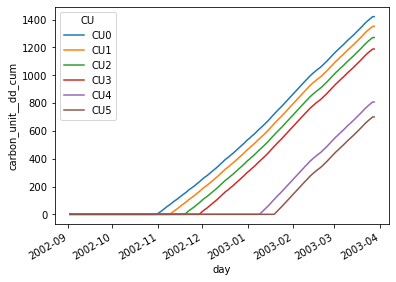

In [10]:
ds_out.carbon_unit__dd_cum.plot.line(x='day')

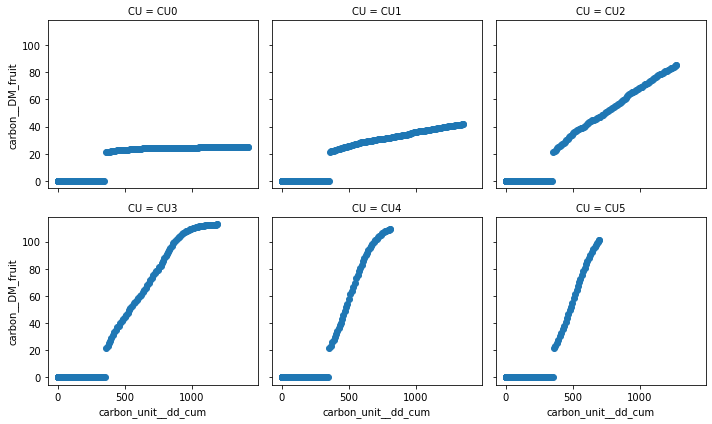

In [11]:
ds_out.plot.scatter(x='carbon_unit__dd_cum', y='carbon__DM_fruit', col='CU', col_wrap=3)